In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dataset =pd.read_excel("C:/Users/DELL/Downloads/Book2.xlsx")
dataset.head()

age  experience  salary
0   28           5   90000
1   45           3   65000
2   36          15  150000
3   52           7   60000
4   29          20  200000

In [20]:
dataset.shape

(13, 3)

In [21]:
dataset.isnull().sum()

age           0
experience    0
salary        0
dtype: int64

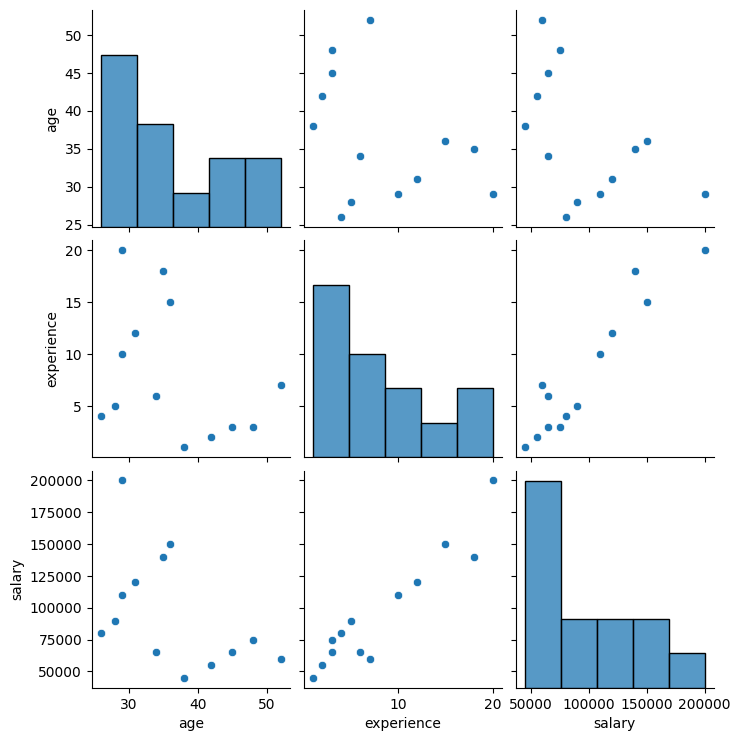

In [22]:
sns.pairplot(data=dataset)
plt.show()

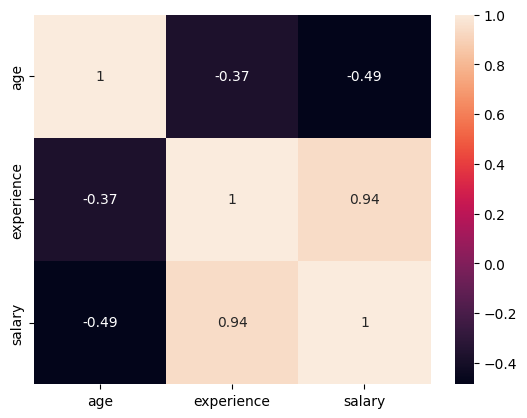

In [23]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [32]:
x=dataset.iloc[:,:-1]
x



age  experience
0    28           5
1    45           3
2    36          15
3    52           7
4    29          20
5    42           2
6    31          12
7    26           4
8    38           1
9    29          10
10   48           3
11   35          18
12   34           6

In [25]:
x=dataset.iloc[:,:-1]
y=["salary"]

In [26]:
dataset.shape

(13, 3)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Load and clean data
data = pd.read_csv("C:/Users/DELL/Downloads/Salary_Data.csv")

# Remove rows where the target variable (Salary) is NaN
data = data.dropna(subset=['Salary'])

# Separate features and target
X = data.drop(columns='Salary')
y = data['Salary']

# Ensure there are no NaNs left in y
print(y.isna().sum())

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


0


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(X_train,y_train)

ValueError: could not convert string to float: 'Female'

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv("C:/Users/DELL/Downloads/Salary_Data.csv")

# Remove rows where the target variable (Salary) is NaN
data = data.dropna(subset=['Salary'])

# Separating features and target
X = data.drop(columns='Salary')
y = data['Salary']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Create a full pipeline with the preprocessor and the model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Evaluate the model
score = model_pipeline.score(X_test, y_test)*100
print(f"Model score on test set: {score}")


Model score on test set: 87.83343288375059


In [33]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [41]:
df=pd.read_csv("C:/Users/DELL/Downloads/homeprices.csv")
df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

In [38]:
import math
df.bedrooms.median()


np.float64(4.0)

In [42]:
df.bedrooms=df.bedrooms.fillna(df.bedrooms.median())
df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

In [45]:
model = linear_model.LinearRegression()
model.fit(df.drop('price',axis="columns"),df.price)

LinearRegression()

In [49]:
model.predict([[3000,3,40]])

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [50]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [10]:
data=pd.read_csv("C:/Users/DELL/Downloads/archive/USA_Housing.csv") 
data.head() 

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386